In [62]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from imblearn.over_sampling import SMOTE

from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier

import graphviz

SEED = 42

# Use Case 1: Patient Triage in the Emergency Room

This notebook is dedicated to the analysis of datasets for patient triage in emergency departments.

In this notebook, students will be allocated to load a synthetic dataset of false patients, to analyse them with statistics and or machine learning methodes, and to apply pre/post treatements if they want.

## Dataset

To illustrate we’ll use a dataset containing the following variables:

| Variable                  | Description                                                   |
|---------------------------|---------------------------------------------------------------|
| Age                       | Age of the patient (in years)                                 |
| BMI                       | Body Mass Index (BMI) of the patient (in Kg/m²)               |
| Gender                    | Gender of the patient (M/F/O/U)                               |
| Chief_Complaint           | Reason for the patient's visit to the emergency department    |
| Chief_Complaint_Severity  | Severity of the patient’s chief complaint                     |
| Stress_Level              | General state of the patient according to the clinician       |
| Dolor_Degree              | Dolor degree self-estimated by the patient (0-10)             |
| D_Blood_Pressure          | Diastolic blood pressure of the patient (in mm Hg)            |
| S_Blood_Pressure          | Systolic blood pressure of the patient (in mm Hg)             |
| Heart_Rate                | Heart rate of the patient (in beats per minute)               |
| Respiratory_Rate          | Respiratory rate of the patient (in breaths per minute)       |
| Triage_Priority           | The triage priority assigned to the patient (0-10)            |

To use this dataset, we first need to load it from the file **UC1-dataset.csv** using the *read_csv* function from the *pandas* library.

In [3]:
df = pd.read_csv("UC1-dataset.csv")
df

,Age,BMI,Gender,Race,Chief_Complaint,Chief_Complaint_Severity,Stress_Level,Dolor_Degree,D_Blood_Pressure,S_Blood_Pressure,Heart_Rate,Respiratory_Rate,Triage_Priority
0,19,24.4,M,white,cough,73,A little bit,2.0,88.0,127.0,83.0,13.0,4
1,94,35.3,F,white,fatigue,60,Not at all,1.0,57.0,114.0,78.0,15.0,10
2,27,24.1,F,white,swollen tonsils,69,Somewhat,3.0,78.0,116.0,82.0,15.0,10
3,29,24.9,F,white,shortness of breath,69,A little bit,3.0,87.0,113.0,96.0,16.0,2
4,81,27.5,M,white,swollen lymph nodes,46,A little bit,1.0,85.0,146.0,99.0,12.0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
17660,73,29.0,M,white,sinus pain,59,Somewhat,2.0,88.0,102.0,75.0,14.0,6
17661,73,29.1,M,white,sinus pain,59,Not at all,0.0,91.0,111.0,94.0,14.0,5
17662,74,29.1,M,white,sinus pain,76,Somewhat,3.0,85.0,112.0,71.0,15.0,2
17663,74,29.5,M,white,sinus pain,76,Not at all,1.0,88.0,109.0,68.0,14.0,4


We can also summarize the values of the different variables using the *describe* function.

In [4]:
df.describe()

,Age,BMI,Chief_Complaint_Severity,Dolor_Degree,D_Blood_Pressure,S_Blood_Pressure,Heart_Rate,Respiratory_Rate,Triage_Priority
count,17665.000000,17665.000000,17665.000000,17665.000000,17665.000000,17665.000000,17665.000000,17665.000000,17665.000000
mean,62.992414,28.541625,59.476762,2.000962,80.328333,117.567733,80.055194,14.003397,5.079083
std,17.879980,1.967160,42.771735,1.226754,14.245187,16.222153,11.576373,1.151750,3.683287
min,18.000000,16.700000,0.000000,0.000000,24.000000,53.000000,60.000000,12.000000,0.000000
25%,51.000000,27.700000,46.000000,1.000000,71.000000,107.000000,70.000000,13.000000,2.000000
50%,64.000000,28.100000,59.000000,2.000000,81.000000,119.000000,80.000000,14.000000,4.000000
75%,76.000000,30.000000,72.000000,3.000000,90.000000,129.000000,90.000000,15.000000,10.000000
max,110.000000,52.000000,541.000000,4.000000,123.000000,170.000000,100.000000,16.000000,10.000000


## Pre-analyzes

Now we have loaded our dataset, we can compute some statistics to analyze it before training.

### Variables distribution

First, let’s compute the distribution of variables’ values in our dataset.

For example, with the age of patients:

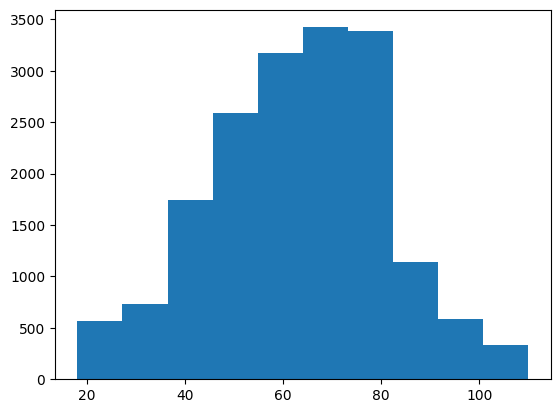

In [5]:
plt.hist(df["Age"])
plt.show()

We can observe that a majority patient coming at emergency services are between 50 and 80 years old. Patients between 20 and 40 years old are underrepresented.

You can perform additionnal analyzes below.

In [ ]:
# your code here

### Correlation between variables

We can also compute a correlation matrice to detect if some variables are correlated (positively or negatively).

To do so, we use the *corr* function of *pandas* on our dataset (we also use the *factorize* function for non-numerical variables).

We obtain then a correlation matrice with, for each cell, a correlation metric between -1 and 1. Close to 1 the two variables are positively correlated, close to -1 the two variables are negatively correlated, close to 0 the two variables are not correlated.

In [6]:
corr_df = df.apply(lambda x: x.factorize()[0]).corr()
corr_df

,Age,BMI,Gender,Race,Chief_Complaint,Chief_Complaint_Severity,Stress_Level,Dolor_Degree,D_Blood_Pressure,S_Blood_Pressure,Heart_Rate,Respiratory_Rate,Triage_Priority
Age,1.000000,-0.031667,-0.019275,0.005306,-0.014761,-0.030483,0.004533,0.002389,0.015921,0.004302,-0.000059,0.004576,-0.015437
BMI,-0.031667,1.000000,0.069003,0.049610,-0.038787,-0.026907,-0.000750,0.020989,-0.016616,-0.004755,0.005205,-0.003996,0.000469
Gender,-0.019275,0.069003,1.000000,0.049847,0.070430,0.013924,0.005849,0.020422,-0.056717,-0.015451,0.003664,-0.006998,0.004098
Race,0.005306,0.049610,0.049847,1.000000,0.021912,0.021200,0.002276,0.002998,-0.018059,0.000176,-0.002909,0.003388,-0.002704
Chief_Complaint,-0.014761,-0.038787,0.070430,0.021912,1.000000,0.285016,-0.000771,0.007388,0.009821,0.010600,-0.005870,-0.003893,-0.007223
Chief_Complaint_Severity,-0.030483,-0.026907,0.013924,0.021200,0.285016,1.000000,0.013648,0.004751,0.012701,0.002188,0.004748,-0.011387,-0.006578
Stress_Level,0.004533,-0.000750,0.005849,0.002276,-0.000771,0.013648,1.000000,-0.013867,-0.003060,0.012948,-0.003994,0.010403,0.005165
Dolor_Degree,0.002389,0.020989,0.020422,0.002998,0.007388,0.004751,-0.013867,1.000000,-0.000955,0.006048,-0.013517,0.000077,0.003546
D_Blood_Pressure,0.015921,-0.016616,-0.056717,-0.018059,0.009821,0.012701,-0.003060,-0.000955,1.000000,0.094382,-0.004539,-0.000853,0.007574
S_Blood_Pressure,0.004302,-0.004755,-0.015451,0.000176,0.010600,0.002188,0.012948,0.006048,0.094382,1.000000,0.006734,-0.010500,0.005581


We can also plot this correlation matrice as a heatmap using the *heatmap* function from the *seaborn* package to observe correlations between variables more easily.

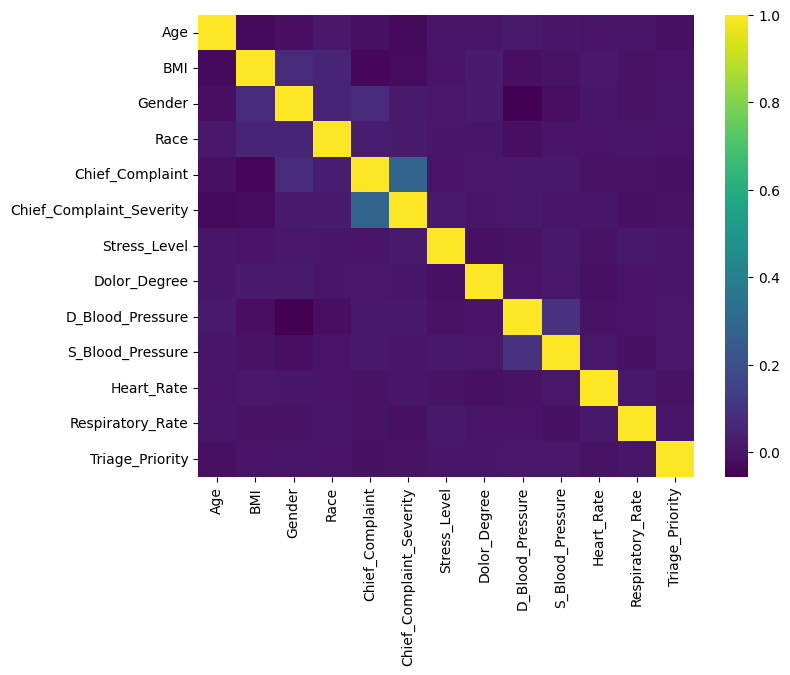

In [7]:
plt.figure(figsize=(8, 6))
sns.heatmap(corr_df, cmap="viridis")
plt.show()

We can observe that variables *Chief_Complaint* and *Chief_Complaint_Severity* are lightly positively correlated, as well as *D_Blood_Pressure* and *S_Blood_Pressure*. Which makes senses.

What do you also observe?

### Additionnal pre-analyzes

If you want to made additionnal pre-analyzes, feel free to do them here.

In [ ]:
# you code here

## Pre-processes

If you want, it’s also possible to perform some pre-processes on the dataset.

For example, you can do data augmentation using the [SMOTE](https://www.jair.org/index.php/jair/article/view/10302) algorithm, which available in the [imbalanced-learn](https://github.com/scikit-learn-contrib/imbalanced-learn) library.

In [8]:
X = df.apply(lambda x: x.factorize()[0]).drop("Triage_Priority", axis=1)
Y = df["Triage_Priority"]

oversample = SMOTE(random_state=SEED)
resampled_X, resampled_Y = oversample.fit_resample(X, Y)

resampled_df = resampled_X
resampled_df["Triage_Priority"] = resampled_Y
resampled_df

,Age,BMI,Gender,Race,Chief_Complaint,Chief_Complaint_Severity,Stress_Level,Dolor_Degree,D_Blood_Pressure,S_Blood_Pressure,Heart_Rate,Respiratory_Rate,Triage_Priority
0,0,0,0,0,0,0,0,0,0,0,0,0,4
1,1,1,1,0,1,1,1,1,1,1,1,1,10
2,2,2,1,0,2,2,2,2,2,2,2,1,10
3,3,3,1,0,3,2,0,2,3,3,3,2,2
4,4,4,0,0,4,3,0,1,4,4,4,3,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
60077,6,39,1,0,15,58,2,0,1,36,26,1,9
60078,8,63,0,0,1,5,2,4,50,47,15,0,9
60079,11,39,0,0,8,5,0,2,21,2,25,1,9
60080,66,31,0,0,7,34,1,4,22,19,7,1,9


As we can observe above, this method allow us to oversample our dataset with additionnal data corresponding to underrepresented data.

For example, patients between 20 and 40 years old (and also below 20 years old).

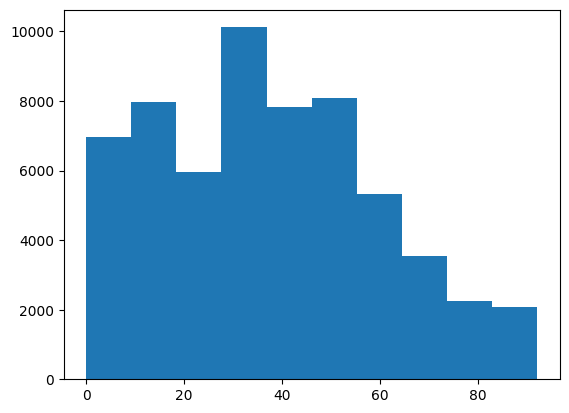

In [9]:
plt.hist(resampled_df["Age"])
plt.show()

You can perform [other methods](https://github.com/scikit-learn-contrib/imbalanced-learn/wiki) for under-sampling or over-sampling the dataset.

In [70]:
# your code here

## Build classifiers

In [27]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.1, random_state=SEED)

### Decision Tree

In [51]:
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train, Y_train)

In [19]:
dot_data = tree.export_graphviz(
        clf, out_file=None, 
        feature_names=list(X.columns),
        class_names=[str(i) for i in range(0,11)], 
        filled=True, rounded=True, 
        special_characters=True
    )
graph = graphviz.Source(dot_data)
graph.render("UC1-decision-tree")

'UC1-decision-tree.pdf'

In [52]:
Y_pred = clf.predict(X_test)
print("Number of mislabeled points out of a total %d points : %d" % (X_test.shape[0], (Y_test != Y_pred).sum()))

Number of mislabeled points out of a total 1767 points : 1489


In [ ]:
# TODO: confusion matrix

### Naive Bayes

In [59]:
clf = GaussianNB()
clf = clf.fit(X_train, Y_train)

In [60]:
Y_pred = clf.predict(X_test)
print("Number of mislabeled points out of a total %d points : %d" % (X_test.shape[0], (Y_test != Y_pred).sum()))

Number of mislabeled points out of a total 1767 points : 1259


In [ ]:
# TODO: confusion matrix

### Neural Networks

In [63]:
clf = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(5, 2), random_state=SEED)
clf = clf.fit(X_train, Y_train)

In [64]:
Y_pred = clf.predict(X_test)
print("Number of mislabeled points out of a total %d points : %d" % (X_test.shape[0], (Y_test != Y_pred).sum()))

Number of mislabeled points out of a total 1767 points : 1251


In [ ]:
# TODO: confusion matrix

## Use your classifier

In [ ]:
# TODO: predict